In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e38fef588d0e47c2f9fbf339bf97916c


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

   



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulladulla
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | socorro
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | troitskoye
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | maneadero
Processing Record 16 of Set 1 | tigil
Processing Record 17 of Set 1 | san pedro
Processing Record 18 of Set 1 | mastic
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of 

Processing Record 39 of Set 4 | moussoro
Processing Record 40 of Set 4 | cabedelo
Processing Record 41 of Set 4 | astoria
Processing Record 42 of Set 4 | khandyga
Processing Record 43 of Set 4 | wiarton
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | buta
Processing Record 46 of Set 4 | filadelfia
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | kokstad
Processing Record 49 of Set 4 | williston
Processing Record 50 of Set 4 | flinders
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | maumere
Processing Record 3 of Set 5 | rundu
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | mosquera
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | port keats
Processing Record 8 of Set 5 | cornwall
Processing Record 9 of Set 5 | la tuque
Processing Record 10 of Set 5 | saskylakh
Processing Record 11 of Set 5 | coahuayana
Processing Record 12 of Set 5 |

Processing Record 26 of Set 8 | bambous virieux
Processing Record 27 of Set 8 | dunedin
Processing Record 28 of Set 8 | aksha
Processing Record 29 of Set 8 | konya
Processing Record 30 of Set 8 | yushala
Processing Record 31 of Set 8 | mayo
Processing Record 32 of Set 8 | alamosa
Processing Record 33 of Set 8 | coffs harbour
Processing Record 34 of Set 8 | salekhard
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | liniere
City not found. Skipping...
Processing Record 37 of Set 8 | pankrushikha
Processing Record 38 of Set 8 | alta floresta
Processing Record 39 of Set 8 | comodoro rivadavia
Processing Record 40 of Set 8 | worland
Processing Record 41 of Set 8 | dingle
Processing Record 42 of Set 8 | bardiyah
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 45 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 46 of Set 8 | cestas
Processing Record 47 of Set 8 | nhulunb

Processing Record 13 of Set 12 | polunochnoye
Processing Record 14 of Set 12 | tambacounda
Processing Record 15 of Set 12 | necochea
Processing Record 16 of Set 12 | sao jose da coroa grande
Processing Record 17 of Set 12 | muriwai beach
Processing Record 18 of Set 12 | motygino
Processing Record 19 of Set 12 | stekolnyy
City not found. Skipping...
Processing Record 20 of Set 12 | cajati
Processing Record 21 of Set 12 | barreirinhas
Processing Record 22 of Set 12 | banjar
Processing Record 23 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 24 of Set 12 | sunggal
Processing Record 25 of Set 12 | kimbe
Processing Record 26 of Set 12 | saint anthony
Processing Record 27 of Set 12 | oistins
Processing Record 28 of Set 12 | atasu
Processing Record 29 of Set 12 | andenes
Processing Record 30 of Set 12 | saint-joseph
Processing Record 31 of Set 12 | cap malheureux
Processing Record 32 of Set 12 | bundaberg
Processing Record 33 of Set 12 | miri
Processing Record 34 of Set 1

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ulladulla,-35.3500,150.4667,58.87,82,100,6.69,AU,2021-11-21 15:17:46
1,Puerto Ayora,-0.7393,-90.3518,75.16,75,77,10.07,EC,2021-11-21 15:17:47
2,Saldanha,-33.0117,17.9442,80.65,72,13,20.15,ZA,2021-11-21 15:17:47
3,Komsomolskiy,40.4272,71.7189,40.42,55,23,4.61,UZ,2021-11-21 15:17:47
4,Rikitea,-23.1203,-134.9692,72.48,68,5,8.88,PF,2021-11-21 15:17:48
5,Socorro,31.6546,-106.3033,59.09,28,75,11.50,US,2021-11-21 15:17:48
6,Troitskoye,52.9821,84.6757,16.21,85,100,4.47,RU,2021-11-21 15:17:49
7,Saint George,37.1041,-113.5841,43.79,52,1,4.00,US,2021-11-21 15:16:34
8,Dikson,73.5069,80.5464,-7.47,75,15,16.17,RU,2021-11-21 15:17:49
9,Hobart,-42.8794,147.3294,55.26,85,90,0.00,AU,2021-11-21 15:13:07


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

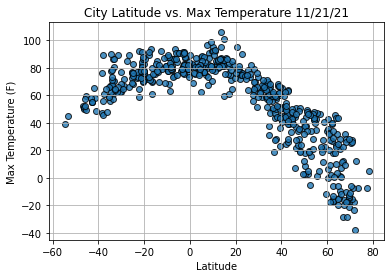

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

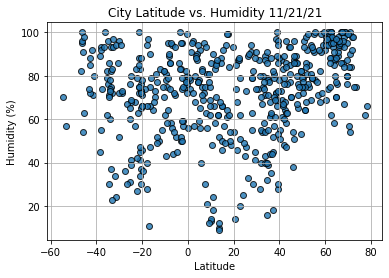

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

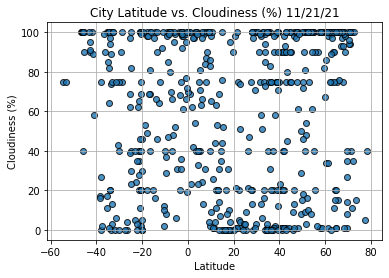

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

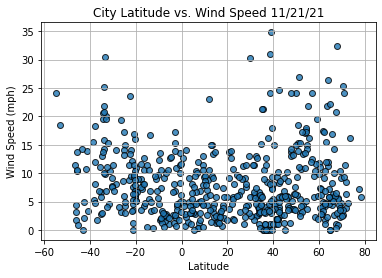

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Komsomolskiy,40.4272,71.7189,40.42,55,23,4.61,UZ,2021-11-21 15:17:47
5,Socorro,31.6546,-106.3033,59.09,28,75,11.50,US,2021-11-21 15:17:48
6,Troitskoye,52.9821,84.6757,16.21,85,100,4.47,RU,2021-11-21 15:17:49
7,Saint George,37.1041,-113.5841,43.79,52,1,4.00,US,2021-11-21 15:16:34
8,Dikson,73.5069,80.5464,-7.47,75,15,16.17,RU,2021-11-21 15:17:49


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

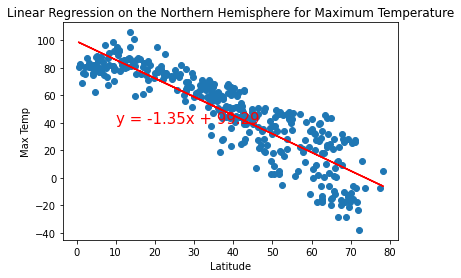

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


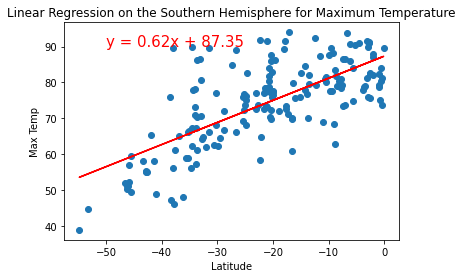

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


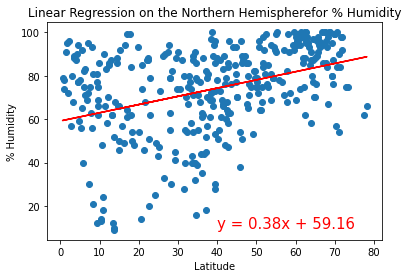

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispherefor % Humidity', '% Humidity',(40,10))

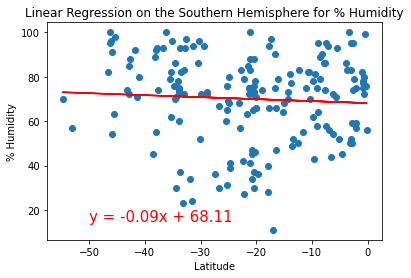

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

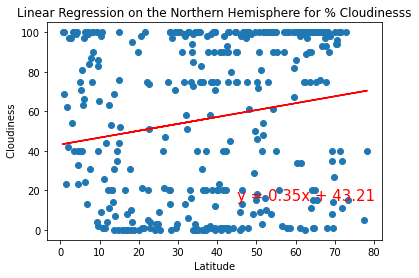

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere for % Cloudinesss',' Cloudiness',(45,15))

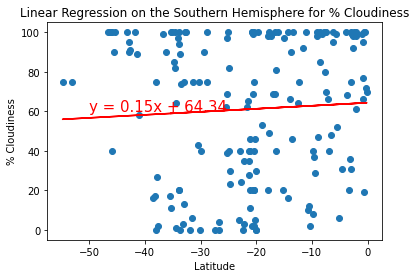

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

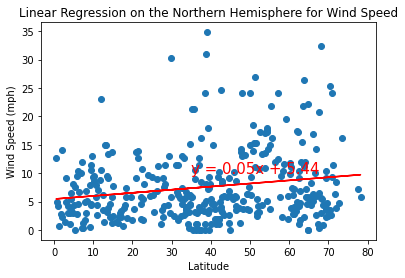

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(35,10))

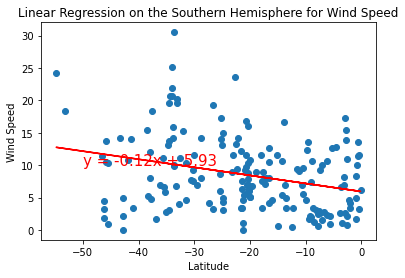

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,10))
